In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
for f in os.listdir("/content/gdrive/MyDrive/face_swap/transformed"):
    os.remove(os.path.join("/content/gdrive/MyDrive/face_swap/transformed", f))

In [3]:
pip install opencv-python


     -------------------------------------- 38.2/38.2 MB 628.8 kB/s eta 0:00:00


In [6]:
pip install cmake


     -------------------------------------- 32.6/32.6 MB 953.9 kB/s eta 0:00:00


In [7]:
pip install dlib


  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for dlib: started
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: still running...
  Running setup.py install for dlib: finished with status 'done'


  DEPRECATION: dlib is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [4]:
pip install --upgrade google-api-python-client

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "c:\users\dell\appdata\local\programs\python\python37\lib\http\client.py", line 447, in read
    n = self.readinto(b)
  File "c:\users\dell\appdata\local\programs\python\python37\lib\http\client.py", line 491, in readinto
    n 


     --                                       0.6/11.0 MB 11.6 kB/s eta 0:14:52


In [2]:
import cv2
import numpy as np
import dlib
import time
import os
from google.colab.patches import cv2_imshow

ModuleNotFoundError: ignored

In [ ]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

In [ ]:
input_path = "/content/gdrive/MyDrive/face_swap/virtual_int.mp4"
output_path = "/content/gdrive/MyDrive/face_swap/frames/"

def extract_frames(input_path,output_path):
    videocapture = cv2.VideoCapture(input_path)
    success,image = videocapture.read()
    count = 0
    while success:
        cv2.imwrite(output_path+"%d.jpg" % count, image)     
        success,image = videocapture.read()
        count += 1
    print('Frames extraction has ended')
    return count

frames = extract_frames(input_path,output_path)

Frames extraction has ended


In [ ]:
import matplotlib.pyplot as plt
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/gdrive/MyDrive/face_swap/shape_predictor_68_face_landmarks.dat")
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/face_swap/transformed/'):
  for filename in filenames:
    #src img
    img = cv2.imread("/content/gdrive/MyDrive/face_swap/obama.png")
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(img_gray)
    mask = np.zeros_like(img_gray)
    #dest img
    img2 = cv2.imread(os.path.join(dirname, filename))
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    
    height, width, channels = img2.shape
    img2_new_face = np.zeros((height, width, channels), np.uint8)

    # Face 1
    faces = detector(img_gray)
    for face in faces:
        landmarks = predictor(img_gray, face)
        landmarks_points = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_points.append((x, y))



        points = np.array(landmarks_points, np.int32)
        convexhull = cv2.convexHull(points)
        # cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
        cv2.fillConvexPoly(mask, convexhull, 255)

        face_image_1 = cv2.bitwise_and(img, img, mask=mask)

        # Delaunay triangulation
        rect = cv2.boundingRect(convexhull)
        subdiv = cv2.Subdiv2D(rect)
        subdiv.insert(landmarks_points)
        triangles = subdiv.getTriangleList()
        triangles = np.array(triangles, dtype=np.int32)

        indexes_triangles = []
        for t in triangles:
            pt1 = (t[0], t[1])
            pt2 = (t[2], t[3])
            pt3 = (t[4], t[5])


            index_pt1 = np.where((points == pt1).all(axis=1))
            index_pt1 = extract_index_nparray(index_pt1)

            index_pt2 = np.where((points == pt2).all(axis=1))
            index_pt2 = extract_index_nparray(index_pt2)

            index_pt3 = np.where((points == pt3).all(axis=1))
            index_pt3 = extract_index_nparray(index_pt3)

            if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
                triangle = [index_pt1, index_pt2, index_pt3]
                indexes_triangles.append(triangle)



    
    # Face 2
    faces2 = detector(img2_gray)
    # print(len(faces2))
    # for face in faces2:
    if len(faces2)<3:
      pass
    else:
      landmarks = predictor(img2_gray, faces2[2])
      landmarks_points2 = []
      for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))


      points2 = np.array(landmarks_points2, np.int32)
      convexhull2 = cv2.convexHull(points2)

      lines_space_mask = np.zeros_like(img_gray)
      lines_space_new_face = np.zeros_like(img2)
      # Triangulation of both faces
      for triangle_index in indexes_triangles:
          # Triangulation of the first face
          tr1_pt1 = landmarks_points[triangle_index[0]]
          tr1_pt2 = landmarks_points[triangle_index[1]]
          tr1_pt3 = landmarks_points[triangle_index[2]]
          triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)


          rect1 = cv2.boundingRect(triangle1)
          (x, y, w, h) = rect1
          cropped_triangle = img[y: y + h, x: x + w]
          cropped_tr1_mask = np.zeros((h, w), np.uint8)


          points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                            [tr1_pt2[0] - x, tr1_pt2[1] - y],
                            [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

          cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

          # Lines space
          cv2.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
          cv2.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
          cv2.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
          lines_space = cv2.bitwise_and(img, img, mask=lines_space_mask)

          # Triangulation of second face
          tr2_pt1 = landmarks_points2[triangle_index[0]]
          tr2_pt2 = landmarks_points2[triangle_index[1]]
          tr2_pt3 = landmarks_points2[triangle_index[2]]
          triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)


          rect2 = cv2.boundingRect(triangle2)
          (x, y, w, h) = rect2

          cropped_tr2_mask = np.zeros((h, w), np.uint8)

          points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                              [tr2_pt2[0] - x, tr2_pt2[1] - y],
                              [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

          cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

          # Warp triangles
          points = np.float32(points)
          points2 = np.float32(points2)
          M = cv2.getAffineTransform(points, points2)
          warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
          warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

          # Reconstructing destination face
          img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
          img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
          _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
          warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

          img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
          img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area

    

    # Face swapped (putting 1st face into 2nd face)
    img2_face_mask = np.zeros_like(img2_gray)
    img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
    img2_face_mask = cv2.bitwise_not(img2_head_mask)


    img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
    result = cv2.add(img2_head_noface, img2_new_face)

    (x, y, w, h) = cv2.boundingRect(convexhull2)
    center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

    seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)
    seamlessclone = seamlessclone.astype('uint8')
    seamlessclone= cv2.cvtColor(seamlessclone, cv2.COLOR_BGR2RGB)
    plt.imsave(os.path.join('/content/gdrive/MyDrive/face_swap/transformed',filename),seamlessclone)

    # cv2.imshow("seamlessclone", seamlessclone)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

In [ ]:
frames = []
for i in range(1701):
  image = cv2.imread(os.path.join('/content/gdrive/MyDrive/face_swap/transformed', str(i)+'.jpg'))
  try:
    height, width, layers = image.shape
    frames.append(image)
  except:
    # print("exception")
    pass
  
frames = np.array(frames)
videomaker = cv2.VideoWriter('/content/gdrive/MyDrive/face_swap/deepfake.avi', cv2.VideoWriter_fourcc(*'DIVX'), 25, (width,height))
 
for frame in frames:
  videomaker.write(frame)

videomaker.release()

In [ ]:
 # #dest img
# img2 = cv2.imread("/content/gdrive/MyDrive/face_swap/frames/100.jpg")
# img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# #src img
# img = cv2.imread("/content/gdrive/MyDrive/face_swap/jim_carrey.jpg")
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# mask = np.zeros_like(img_gray)
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor("/content/gdrive/MyDrive/face_swap/shape_predictor_68_face_landmarks.dat")
# height, width, channels = img2.shape
# img2_new_face = np.zeros((height, width, channels), np.uint8)


In [ ]:
# # Face 1
# faces = detector(img_gray)
# for face in faces:
#     landmarks = predictor(img_gray, face)
#     landmarks_points = []
#     for n in range(0, 68):
#         x = landmarks.part(n).x
#         y = landmarks.part(n).y
#         landmarks_points.append((x, y))
        
#     points = np.array(landmarks_points, np.int32)
#     convexhull = cv2.convexHull(points)
#     # cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
#     cv2.fillConvexPoly(mask, convexhull, 255)

#     face_image_1 = cv2.bitwise_and(img, img, mask=mask)

#     # Delaunay triangulation
#     rect = cv2.boundingRect(convexhull)
#     subdiv = cv2.Subdiv2D(rect)
#     subdiv.insert(landmarks_points)
#     triangles = subdiv.getTriangleList()
#     triangles = np.array(triangles, dtype=np.int32)

#     indexes_triangles = []
#     for t in triangles:
#         pt1 = (t[0], t[1])
#         pt2 = (t[2], t[3])
#         pt3 = (t[4], t[5])


#         index_pt1 = np.where((points == pt1).all(axis=1))
#         index_pt1 = extract_index_nparray(index_pt1)

#         index_pt2 = np.where((points == pt2).all(axis=1))
#         index_pt2 = extract_index_nparray(index_pt2)

#         index_pt3 = np.where((points == pt3).all(axis=1))
#         index_pt3 = extract_index_nparray(index_pt3)

#         if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
#             triangle = [index_pt1, index_pt2, index_pt3]
#             indexes_triangles.append(triangle)

In [ ]:
# # Face 2
# faces2 = detector(img2_gray)
# for face in faces2:
#     landmarks = predictor(img2_gray, face)
#     landmarks_points2 = []
#     for n in range(0, 68):
#         x = landmarks.part(n).x
#         y = landmarks.part(n).y
#         landmarks_points2.append((x, y))


#     points2 = np.array(landmarks_points2, np.int32)
#     convexhull2 = cv2.convexHull(points2)

# lines_space_mask = np.zeros_like(img_gray)
# lines_space_new_face = np.zeros_like(img2)

In [ ]:
# # Triangulation of both faces
# for triangle_index in indexes_triangles:
#     # Triangulation of the first face
#     tr1_pt1 = landmarks_points[triangle_index[0]]
#     tr1_pt2 = landmarks_points[triangle_index[1]]
#     tr1_pt3 = landmarks_points[triangle_index[2]]
#     triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)


#     rect1 = cv2.boundingRect(triangle1)
#     (x, y, w, h) = rect1
#     cropped_triangle = img[y: y + h, x: x + w]
#     cropped_tr1_mask = np.zeros((h, w), np.uint8)


#     points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
#                        [tr1_pt2[0] - x, tr1_pt2[1] - y],
#                        [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

#     cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

#     # Lines space
#     cv2.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
#     cv2.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
#     cv2.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
#     lines_space = cv2.bitwise_and(img, img, mask=lines_space_mask)

#     # Triangulation of second face
#     tr2_pt1 = landmarks_points2[triangle_index[0]]
#     tr2_pt2 = landmarks_points2[triangle_index[1]]
#     tr2_pt3 = landmarks_points2[triangle_index[2]]
#     triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)


#     rect2 = cv2.boundingRect(triangle2)
#     (x, y, w, h) = rect2

#     cropped_tr2_mask = np.zeros((h, w), np.uint8)

#     points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
#                         [tr2_pt2[0] - x, tr2_pt2[1] - y],
#                         [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

#     cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

#     # Warp triangles
#     points = np.float32(points)
#     points2 = np.float32(points2)
#     M = cv2.getAffineTransform(points, points2)
#     warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
#     warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

#     # Reconstructing destination face
#     img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
#     img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
#     _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
#     warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

#     img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
#     img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area

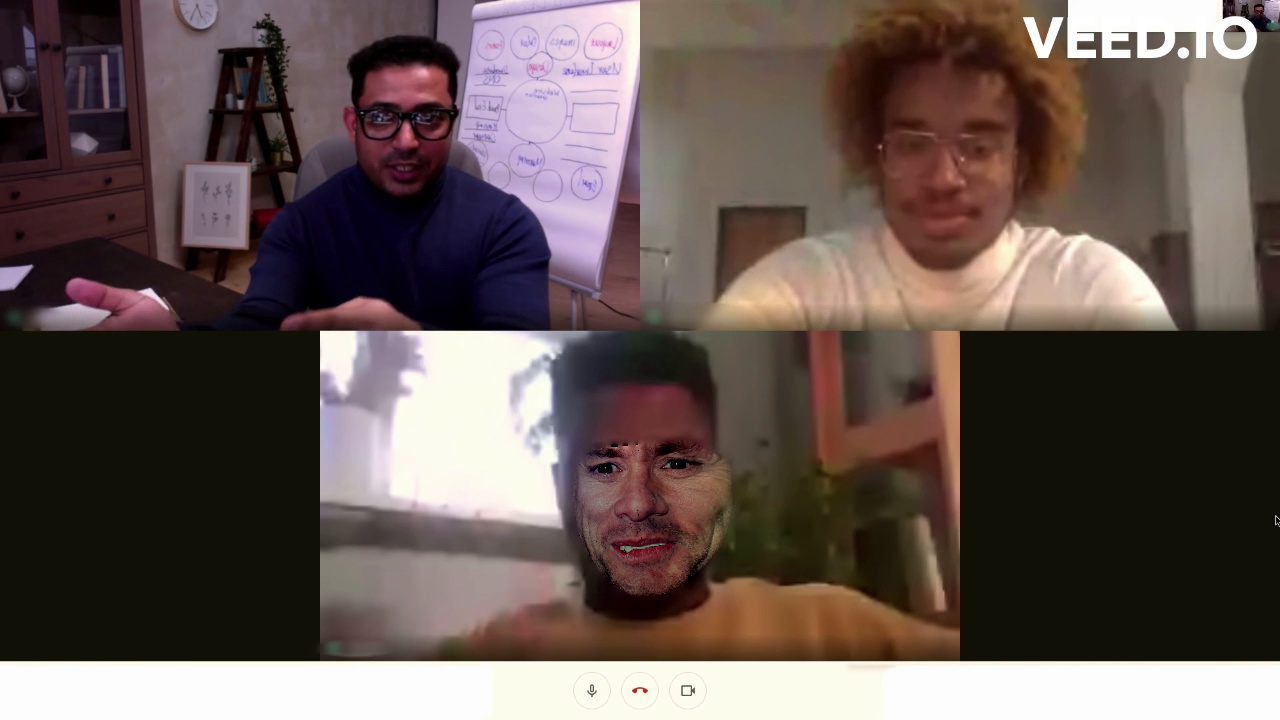

In [ ]:
# # Face swapped (putting 1st face into 2nd face)


# img2_face_mask = np.zeros_like(img2_gray)
# img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
# img2_face_mask = cv2.bitwise_not(img2_head_mask)


# img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
# result = cv2.add(img2_head_noface, img2_new_face)

# (x, y, w, h) = cv2.boundingRect(convexhull2)
# center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

# seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)

# cv2_imshow(seamlessclone)
# cv2.waitKey(0)



# cv2.destroyAllWindows()

In [ ]:
# import cv2
# import numpy as np
# import dlib
# import time
# import matplotlib.pyplot as plt


# def extract_index_nparray(nparray):
#     index = None
#     for num in nparray[0]:
#         index = num
#         break
#     return index


# img = cv2.imread("/content/gdrive/MyDrive/face_swap/bradley_cooper.jpg")
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# mask = np.zeros_like(img_gray)
# img2 = cv2.imread("/content/gdrive/MyDrive/face_swap/jim_carrey.jpg")
# img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor("/content/gdrive/MyDrive/face_swap/shape_predictor_68_face_landmarks.dat")
# height, width, channels = img2.shape
# img2_new_face = np.zeros((height, width, channels), np.uint8)




# # Face 1
# faces = detector(img_gray)
# for face in faces:
#     landmarks = predictor(img_gray, face)
#     landmarks_points = []
#     for n in range(0, 68):
#         x = landmarks.part(n).x
#         y = landmarks.part(n).y
#         landmarks_points.append((x, y))



#     points = np.array(landmarks_points, np.int32)
#     convexhull = cv2.convexHull(points)
#     # cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
#     cv2.fillConvexPoly(mask, convexhull, 255)

#     face_image_1 = cv2.bitwise_and(img, img, mask=mask)

#     # Delaunay triangulation
#     rect = cv2.boundingRect(convexhull)
#     subdiv = cv2.Subdiv2D(rect)
#     subdiv.insert(landmarks_points)
#     triangles = subdiv.getTriangleList()
#     triangles = np.array(triangles, dtype=np.int32)

#     indexes_triangles = []
#     for t in triangles:
#         pt1 = (t[0], t[1])
#         pt2 = (t[2], t[3])
#         pt3 = (t[4], t[5])


#         index_pt1 = np.where((points == pt1).all(axis=1))
#         index_pt1 = extract_index_nparray(index_pt1)

#         index_pt2 = np.where((points == pt2).all(axis=1))
#         index_pt2 = extract_index_nparray(index_pt2)

#         index_pt3 = np.where((points == pt3).all(axis=1))
#         index_pt3 = extract_index_nparray(index_pt3)

#         if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
#             triangle = [index_pt1, index_pt2, index_pt3]
#             indexes_triangles.append(triangle)



# # Face 2
# faces2 = detector(img2_gray)
# for face in faces2:
#     landmarks = predictor(img2_gray, face)
#     landmarks_points2 = []
#     for n in range(0, 68):
#         x = landmarks.part(n).x
#         y = landmarks.part(n).y
#         landmarks_points2.append((x, y))


#     points2 = np.array(landmarks_points2, np.int32)
#     convexhull2 = cv2.convexHull(points2)

# lines_space_mask = np.zeros_like(img_gray)
# lines_space_new_face = np.zeros_like(img2)
# # Triangulation of both faces
# for triangle_index in indexes_triangles:
#     # Triangulation of the first face
#     tr1_pt1 = landmarks_points[triangle_index[0]]
#     tr1_pt2 = landmarks_points[triangle_index[1]]
#     tr1_pt3 = landmarks_points[triangle_index[2]]
#     triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)


#     rect1 = cv2.boundingRect(triangle1)
#     (x, y, w, h) = rect1
#     cropped_triangle = img[y: y + h, x: x + w]
#     cropped_tr1_mask = np.zeros((h, w), np.uint8)


#     points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
#                        [tr1_pt2[0] - x, tr1_pt2[1] - y],
#                        [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

#     cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

#     # Lines space
#     cv2.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
#     cv2.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
#     cv2.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
#     lines_space = cv2.bitwise_and(img, img, mask=lines_space_mask)

#     # Triangulation of second face
#     tr2_pt1 = landmarks_points2[triangle_index[0]]
#     tr2_pt2 = landmarks_points2[triangle_index[1]]
#     tr2_pt3 = landmarks_points2[triangle_index[2]]
#     triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)


#     rect2 = cv2.boundingRect(triangle2)
#     (x, y, w, h) = rect2

#     cropped_tr2_mask = np.zeros((h, w), np.uint8)

#     points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
#                         [tr2_pt2[0] - x, tr2_pt2[1] - y],
#                         [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

#     cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

#     # Warp triangles
#     points = np.float32(points)
#     points2 = np.float32(points2)
#     M = cv2.getAffineTransform(points, points2)
#     warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
#     warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

#     # Reconstructing destination face
#     img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
#     img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
#     _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
#     warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

#     img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
#     img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area



# # Face swapped (putting 1st face into 2nd face)
# img2_face_mask = np.zeros_like(img2_gray)
# img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
# img2_face_mask = cv2.bitwise_not(img2_head_mask)


# img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
# result = cv2.add(img2_head_noface, img2_new_face)

# (x, y, w, h) = cv2.boundingRect(convexhull2)
# center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

# seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)
# seamlessclone= cv2.cvtColor(seamlessclone, cv2.COLOR_BGR2RGB)

# plt.imshow(seamlessclone)
# cv2.waitKey(0)



# cv2.destroyAllWindows()


In [1]:
pip install speech_recognition

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement speech_recognition (from versions: none)
ERROR: No matching distribution found for speech_recognition
